<a href="https://colab.research.google.com/github/Shanks1234567/Extrovert-vs.-Introvert-Behavior/blob/main/Extrovert_vs_Introvert_Behavior_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install opendatasets

In [54]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data")

Skipping, found downloaded files in "./extrovert-vs-introvert-behavior-data" (use force=True to force download)


In [55]:
import pandas as pd
import os

dataset_path="/content/extrovert-vs-introvert-behavior-data"

file_list=os.listdir(dataset_path)
print("Files in the dataset directory:",file_list)

Files in the dataset directory: ['personality_datasert.csv', 'personality_dataset.csv']


In [56]:
csv_file_path='/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv'
df=pd.read_csv(csv_file_path)
display(df.head(100))

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
95,3.0,No,7.0,6.0,No,11.0,10.0,Extrovert
96,1.0,No,5.0,NaN,No,10.0,9.0,Extrovert
97,3.0,No,10.0,6.0,No,14.0,7.0,Extrovert
98,4.0,No,10.0,7.0,No,8.0,10.0,Extrovert


In [57]:
import pandas as pd
import os

# Define the path to the downloaded dataset
dataset_path = './extrovert-vs-introvert-behavior-data'

# List files in the downloaded directory to find the CSV file
file_list = os.listdir(dataset_path)
print("Files in the dataset directory:", file_list)

# Assuming the CSV file is named 'Extrovert_vs_Introvert.csv' based on common Kaggle practices
csv_file_path = os.path.join(dataset_path, 'Extrovert_vs_Introvert.csv')

# Check if the CSV file exists before loading
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    display(df.head())
else:
    print(f"CSV file not found at: {csv_file_path}")
    print("Please check the file name in the dataset directory and update the 'csv_file_path' variable.")

Files in the dataset directory: ['personality_datasert.csv', 'personality_dataset.csv']
CSV file not found at: ./extrovert-vs-introvert-behavior-data/Extrovert_vs_Introvert.csv
Please check the file name in the dataset directory and update the 'csv_file_path' variable.


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


 Distribution Plots for Numerical Columns

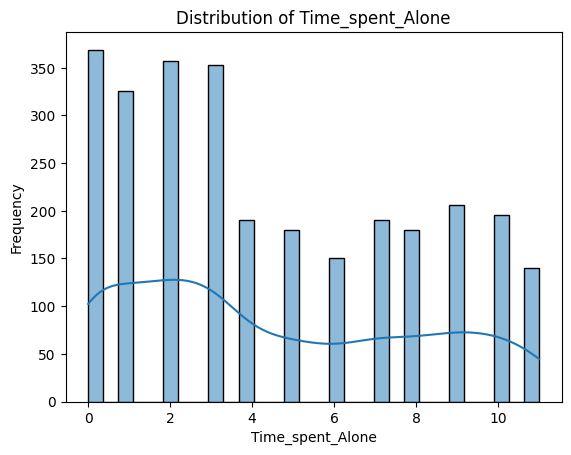

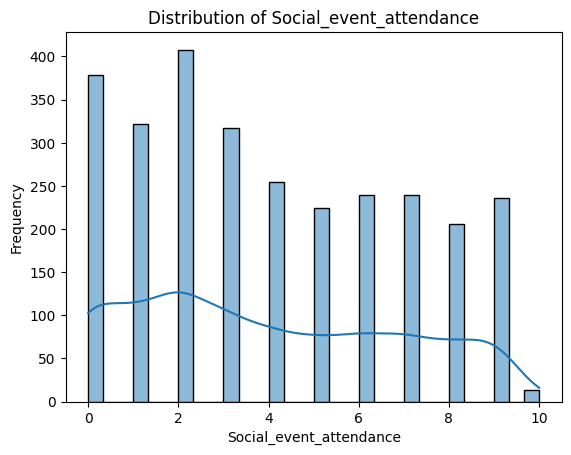

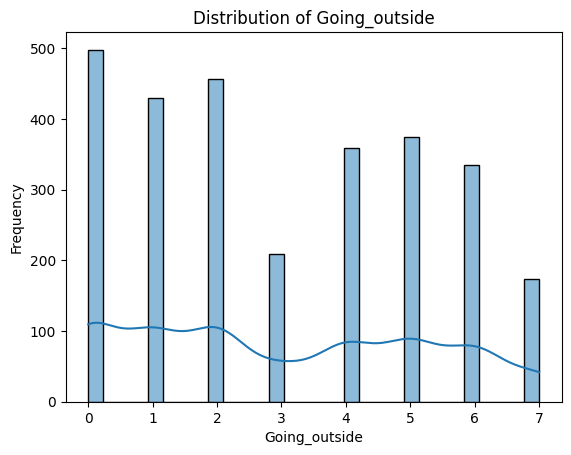

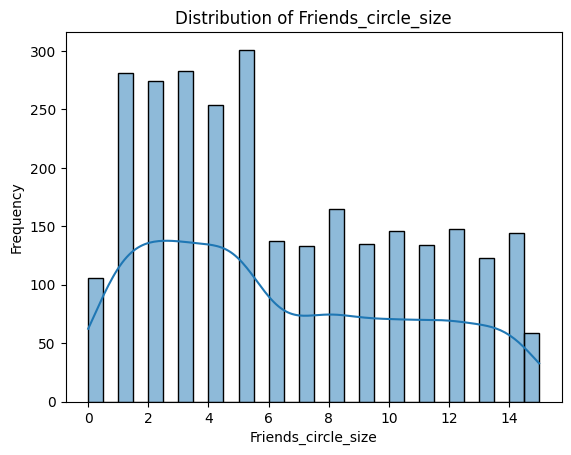

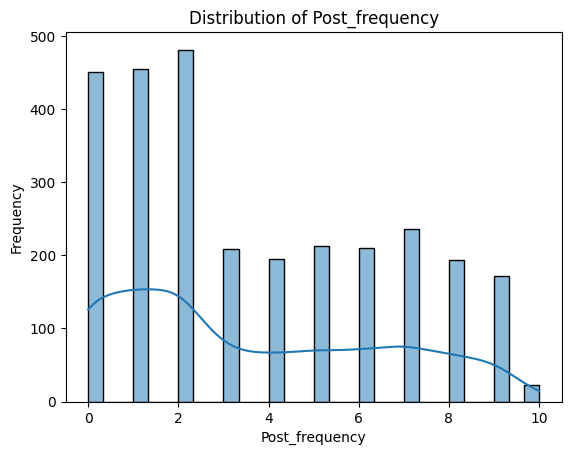

In [59]:
# 1. Distribution Plots for Numerical Columns
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Distribution for categorical colums

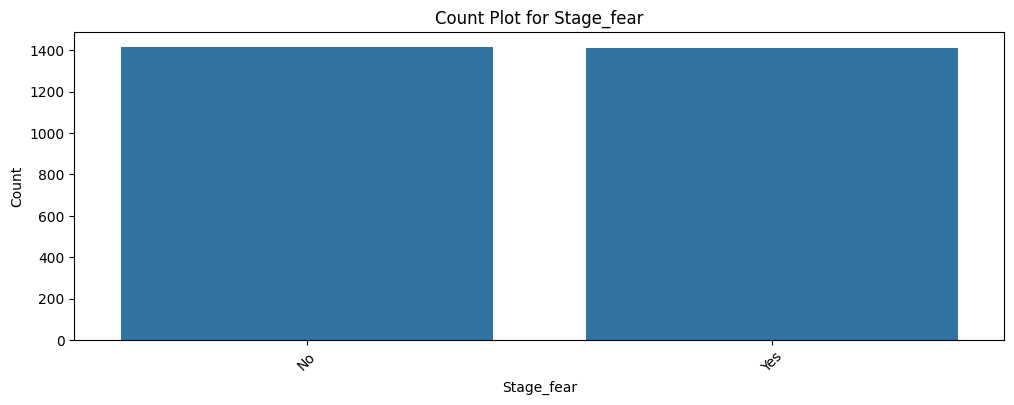

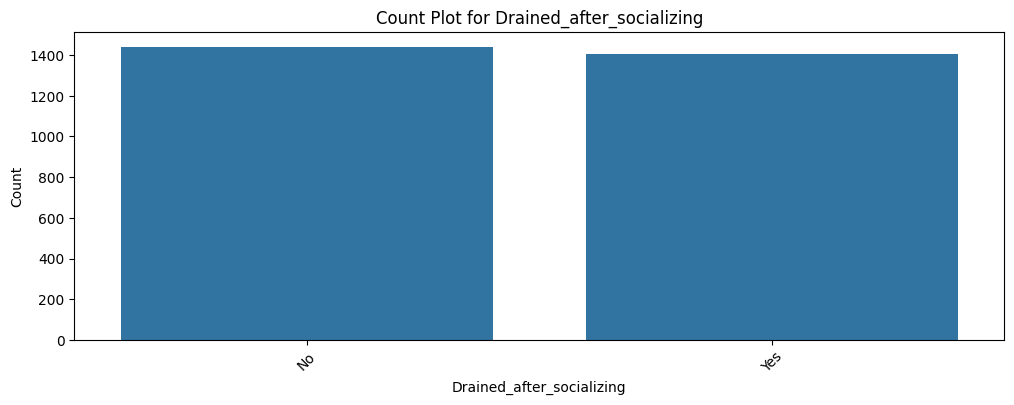

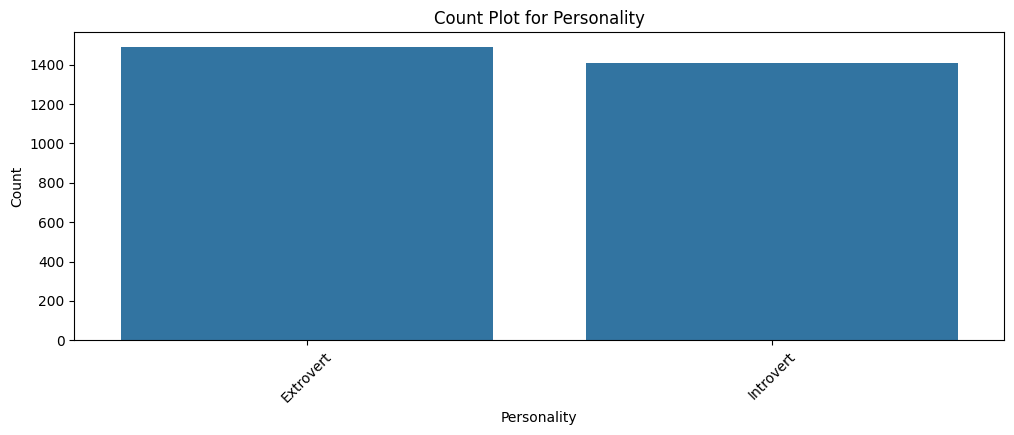

In [60]:
# 1. Distribution Plots for categorical Columns
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Stage_fear','Drained_after_socializing','Personality']


for col in cat_cols:
    plt.figure(figsize=(12, 4))
    order = df[col].value_counts().index  # sort by frequency
    sns.countplot(x=col, data=df, order=order)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

Correlation Heatmap

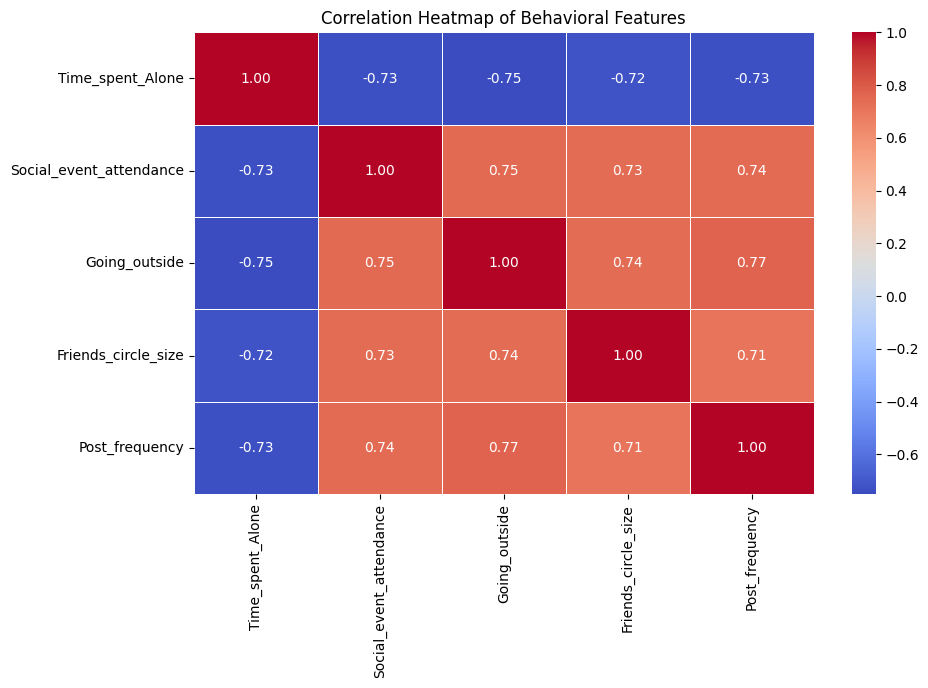

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Behavioral Features')
plt.show()


Missing Values Check

In [62]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the missing value summary
print("Missing values in each column:\n")
print(missing_values)

# Optional: Display only columns with missing values
print("\nColumns with missing values only:\n")
print(missing_values[missing_values > 0])


Missing values in each column:

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

Columns with missing values only:

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64


Visualize the missing values before cleaning


/tmp/ipython-input-2165478373.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MissingCount', y='Column', data=missing_df, palette='viridis')


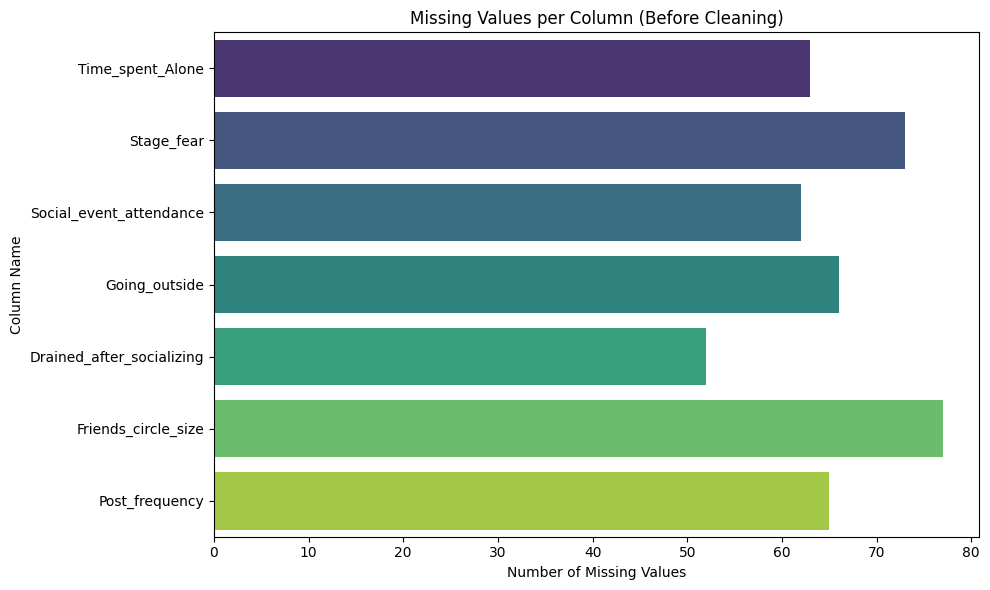

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing data

# 2. Convert to DataFrame for plotting
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'MissingCount']

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='MissingCount', y='Column', data=missing_df, palette='viridis')
plt.title('Missing Values per Column (Before Cleaning)')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column Name')
plt.tight_layout()
plt.show()




Handle Missing Values

In [64]:
import pandas as pd

# Separate columns by data type
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Fill numerical columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Check again for any remaining missing values
print("Any missing values left?", df.isnull().sum().sum() > 0)



Any missing values left? False


/tmp/ipython-input-423878946.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-423878946.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

After Handle Missing Values

In [65]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the missing value summary
print("Missing values in each column:\n")
print(missing_values)

# Optional: Display only columns with missing values
print("\nColumns with missing values only:\n")
print(missing_values[missing_values > 0])

Missing values in each column:

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Columns with missing values only:

Series([], dtype: int64)


Visualize After Handling Missing Values

Missing values per column AFTER handling:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


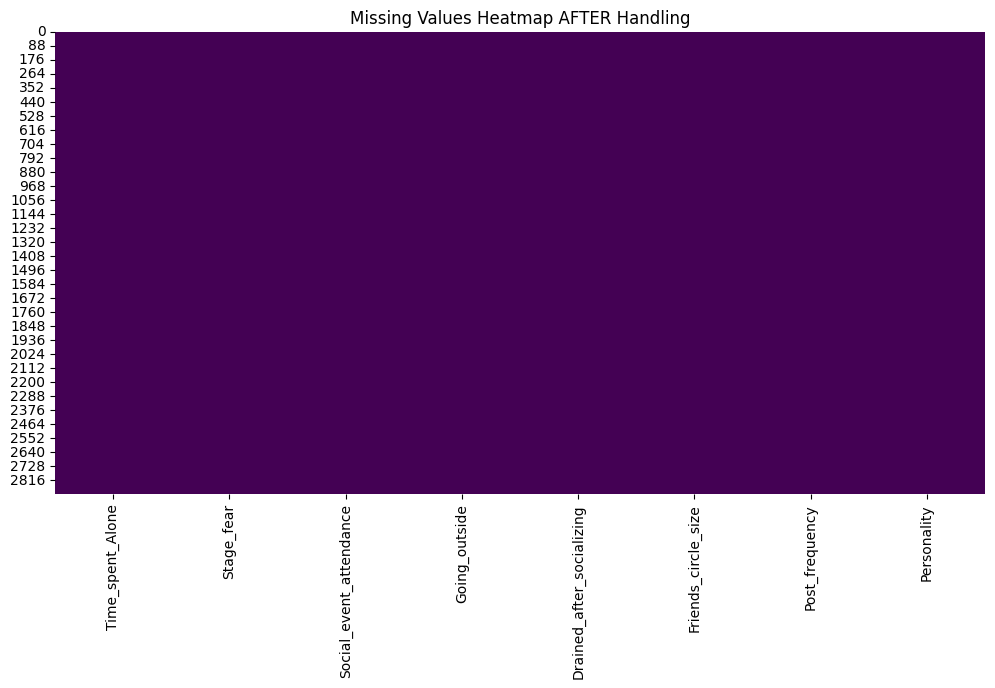

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values count again
print("Missing values per column AFTER handling:")
print(df.isnull().sum())

# Visualize heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap AFTER Handling')
plt.show()


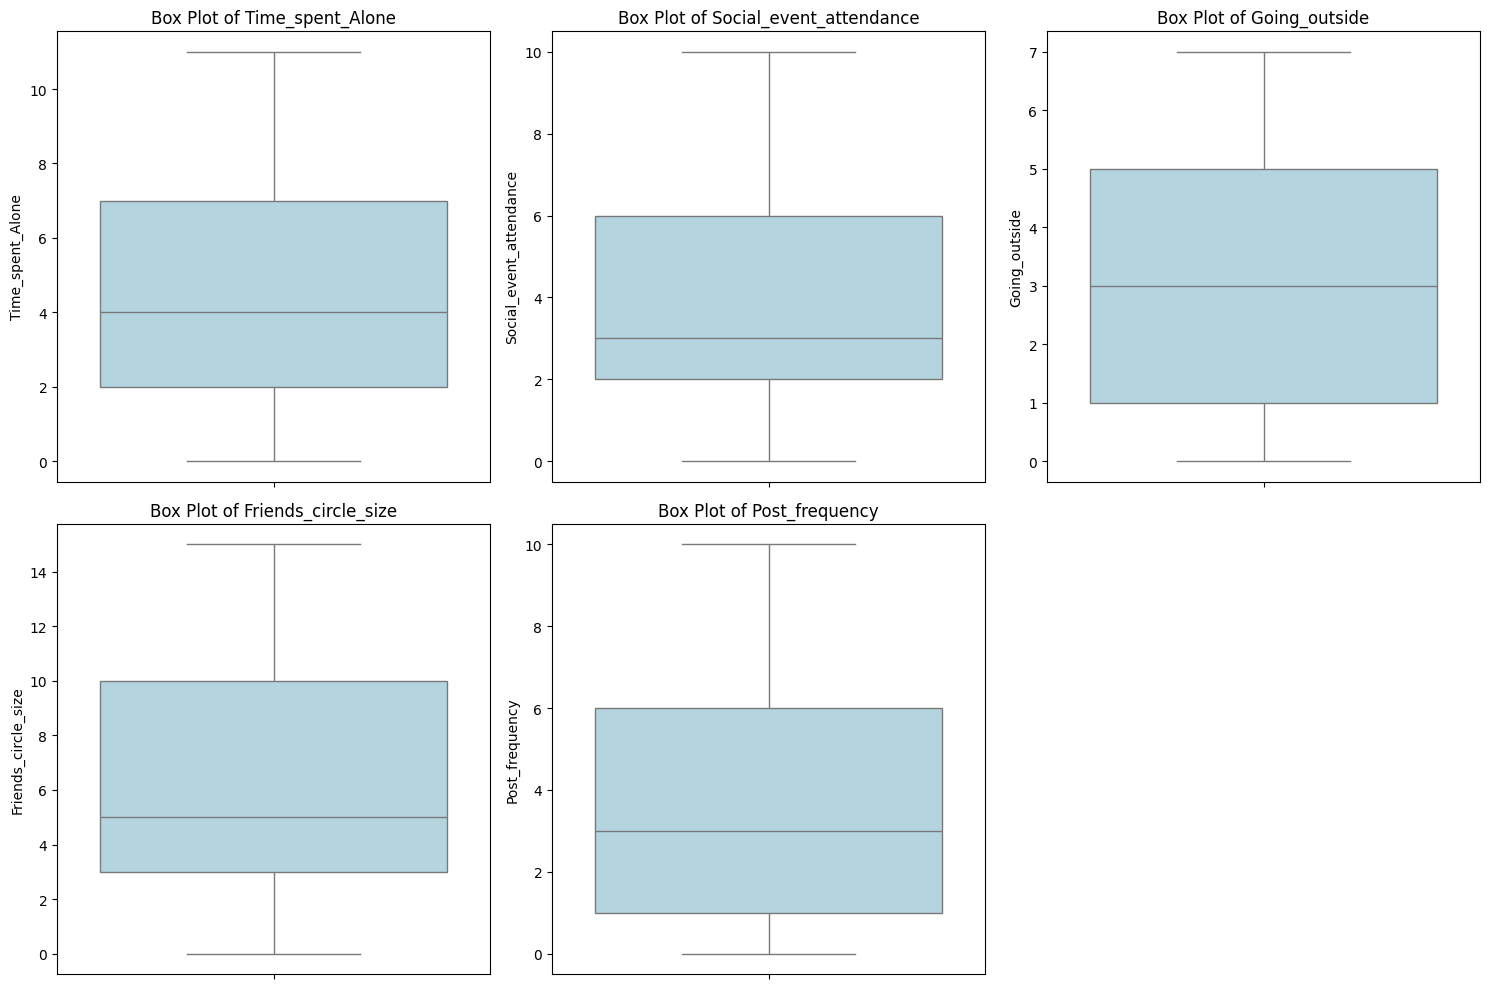

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


**Hypothesis Testing**

**Pearson Correlation**

H₀ :There is no linear correlation between the two variables in the population.

H₁ :There is a linear correlation between the two variables in the population.

In [68]:
from scipy.stats import pearsonr
import pandas as pd

# Load dataset
csv_file_path = './extrovert-vs-introvert-behavior-data/personality_dataset.csv'
df = pd.read_csv(csv_file_path)
df.columns = df.columns.str.strip()  # Clean column names

# Variables
x = df['Time_spent_Alone']
y = df['Social_event_attendance']

# Pearson correlation
corr, p_value = pearsonr(x, y)

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → There is a statistically significant correlation.")
else:
    print("Fail to reject H₀ → No statistically significant correlation found.")

Pearson Correlation Coefficient: nan
P-value: nan
Fail to reject H₀ → No statistically significant correlation found.


**One way Anova**

H₀ :All group means are equal.


H₁ :At least one group mean is different from the others.



In [69]:
from scipy.stats import f_oneway
import pandas as pd

# Load dataset
df = pd.read_csv('/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df.columns = df.columns.str.strip()
df = df.dropna()

# Group data
extroverts = df[df['Personality'] == 'Extrovert']['Time_spent_Alone']
introverts = df[df['Personality'] == 'Introvert']['Time_spent_Alone']

# One-way ANOVA
f_stat, p_value = f_oneway(extroverts, introverts)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → There is a statistically significant difference in means.")
else:
    print("Fail to reject H₀ → No statistically significant difference in means.")


F-statistic: 2414.469
P-value: 0.00000
Reject H₀ → There is a statistically significant difference in means.


**Two way Anova**

In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene

# Load and tidy
df = pd.read_csv('/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df.columns = df.columns.str.strip()

# Fill missing values with median/mode as done previously
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


# Make sure factors are categorical. We need to check if 'Gender' column exists before converting it.
# Based on the df.info() output, there is no 'Gender' column. I will remove it from the analysis.
df['Personality'] = df['Personality'].astype('category')
# df['Gender'] = df['Gender'].astype('category') # Removed as 'Gender' column does not exist

# Two-way ANOVA with interaction (assuming a second factor is available and relevant, otherwise a one-way ANOVA might be more appropriate)
# Since 'Gender' is not available, I will perform a one-way ANOVA based on 'Personality'
model = ols('Time_spent_Alone ~ C(Personality)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II SS
print("One-way ANOVA (Type II):\n", anova_table)

# Partial eta-squared effect sizes: SS_effect / (SS_effect + SS_error)
ss_error = anova_table.loc['Residual', 'sum_sq']
eta_partial = (anova_table.loc[['C(Personality)'], 'sum_sq'] /
               (anova_table.loc[['C(Personality)'], 'sum_sq'] + ss_error))
print("\nPartial eta-squared:\n", eta_partial.rename('η_p²'))

# Assumption check: Levene’s test for homogeneity across all groups
cell_groups = [g['Time_spent_Alone'].values for _, g in df.groupby('Personality')]
lev_stat, lev_p = levene(*cell_groups, center='median')
print(f"\nLevene’s test across groups: stat={lev_stat:.3f}, p={lev_p:.5f}")

# Quick decision helper at alpha=0.05
alpha = 0.05
p = anova_table.loc['C(Personality)', 'PR(>F)']
verdict = "Reject H0" if p < alpha else "Fail to reject H0"
print(f"C(Personality): p={p:.5f} → {verdict}")

One-way ANOVA (Type II):
                       sum_sq      df            F  PR(>F)
C(Personality)  17433.812770     1.0  2987.573877     0.0
Residual        16911.109643  2898.0          NaN     NaN

Partial eta-squared:
 C(Personality)    0.50761
Name: η_p², dtype: float64

Levene’s test across groups: stat=158.185, p=0.00000
C(Personality): p=0.00000 → Reject H0


/tmp/ipython-input-3221834211.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3221834211.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**MAE**

H₀:The model’s mean absolute error is equal to or greater than the benchmark.



H₁:The model’s mean absolute error is less than the benchmark (better performance).




In [71]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Load dataset
df = pd.read_csv('/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Time_spent_Alone', 'Social_event_attendance'])

# Compute MAE
mae_value = mean_absolute_error(df['Social_event_attendance'], df['Time_spent_Alone'])
print(f"Mean Absolute Error: {mae_value:.3f}")

# Optional: test against a benchmark
E0 = 5  # example target error
if mae_value < E0:
    print("Reject H₀ → MAE is significantly less than benchmark.")
else:
    print("Fail to reject H₀ → MAE is not less than benchmark.")


Mean Absolute Error: 5.487
Fail to reject H₀ → MAE is not less than benchmark.


**Levene's Test**

H₀: All group variances are equal.




H₁: At least one group variance differs.

In [72]:
import pandas as pd
from scipy.stats import levene

# Load dataset
df = pd.read_csv('/content/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Time_spent_Alone', 'Personality'])

# Split into groups
extroverts = df[df['Personality'] == 'Extrovert']['Time_spent_Alone']
introverts = df[df['Personality'] == 'Introvert']['Time_spent_Alone']

# Classic Levene’s Test (center=mean)
stat, p_value = levene(extroverts, introverts, center='mean')

print(f"Levene’s Test Statistic: {stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → Variances are significantly different.")
else:
    print("Fail to reject H₀ → Variances are not significantly different.")


Levene’s Test Statistic: 145.795
P-value: 0.00000
Reject H₀ → Variances are significantly different.


**Feature selection**

In [73]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Separate features and target
target_col = "Personality"
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target labels
le_target = LabelEncoder()
y = le_target.fit_transform(y)  # Extrovert/Introvert → numeric

# Define numerical and categorical columns in X (excluding the target)
num_cols_X = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols_X = ["Stage_fear", "Drained_after_socializing"]

# Fill numerical columns with median in X
for col in num_cols_X:
    median_val = X[col].median()
    X[col].fillna(median_val, inplace=True)

# Fill categorical columns with mode in X
for col in cat_cols_X:
    mode_val = X[col].mode()[0]
    X[col].fillna(mode_val, inplace=True)


# Encode categorical features in X after imputation
le = LabelEncoder()
for col in cat_cols_X:
    X[col] = le.fit_transform(X[col])


print(X.head())
print(y[:10])

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  
0                          0                 13.0             5.0  
1                          1                  0.0             3.0  
2                          1                  5.0             2.0  
3                          0                 14.0             8.0  
4                          0                  8.0             5.0  
[0 1 1 0 0 0 0 0 1 0]


/tmp/ipython-input-2259078671.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_val, inplace=True)
/tmp/ipython-input-2259078671.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

**Train Test Split (80-20)**

In [74]:
from sklearn.model_selection import train_test_split

# Apply train-test split
# Assuming X contains features and y contains the target variable from previous steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2269, 7)
Shape of X_test: (568, 7)
Shape of y_train: (2269,)
Shape of y_test: (568,)


### Baseline Models: Logistic Regression and Decision Tree

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Train Decision Tree
dec_tree.fit(X_train, y_train)
y_pred_dt = dec_tree.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Logistic Regression Performance:
Accuracy: 0.926056338028169
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       293
           1       0.92      0.93      0.92       275

    accuracy                           0.93       568
   macro avg       0.93      0.93      0.93       568
weighted avg       0.93      0.93      0.93       568


Decision Tree Performance:
Accuracy: 0.8732394366197183
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       293
           1       0.88      0.85      0.87       275

    accuracy                           0.87       568
   macro avg       0.87      0.87      0.87       568
weighted avg       0.87      0.87      0.87       568



### Advanced Models: Random Forest, XGBoost, and SVM

In [76]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Train SVM
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Random Forest Performance:
Accuracy: 0.9225352112676056
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       293
           1       0.91      0.93      0.92       275

    accuracy                           0.92       568
   macro avg       0.92      0.92      0.92       568
weighted avg       0.92      0.92      0.92       568


XGBoost Performance:
Accuracy: 0.9225352112676056
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       293
           1       0.90      0.94      0.92       275

    accuracy                           0.92       568
   macro avg       0.92      0.92      0.92       568
weighted avg       0.92      0.92      0.92       568


SVM Performance:
Accuracy: 0.9313380281690141
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       293
           1       0.92      0.94      0.93       275

    accuracy                

### Model Evaluation: Metrics and Visualizations for Binary Classification

--- Random Forest Evaluation ---
Accuracy: 0.9225
Precision: 0.9140
Recall: 0.9273
F1-score: 0.9206
ROC-AUC: 0.9227


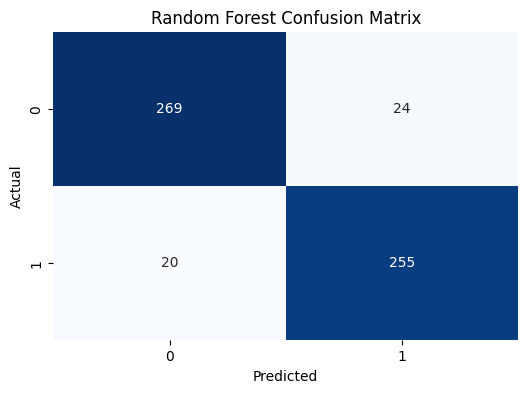

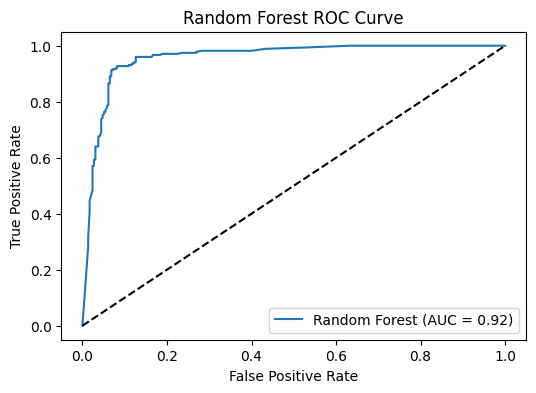

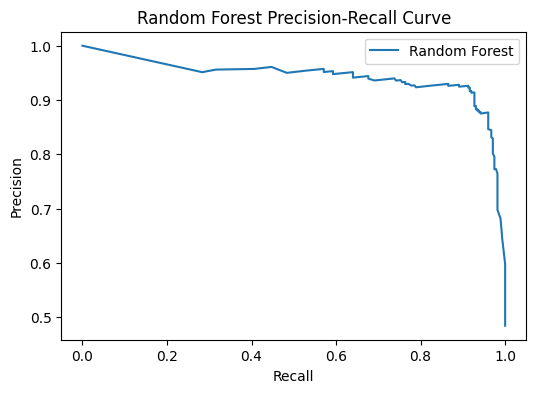

--- XGBoost Evaluation ---
Accuracy: 0.9225
Precision: 0.9024
Recall: 0.9418
F1-score: 0.9217
ROC-AUC: 0.9231


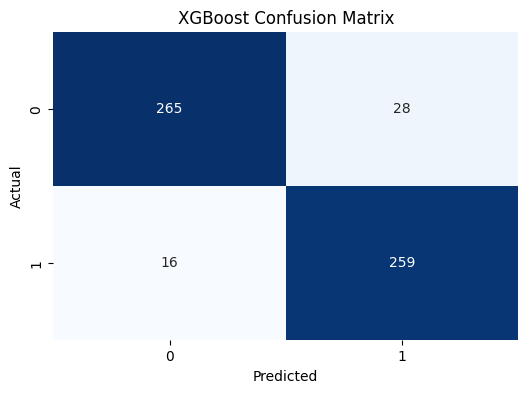

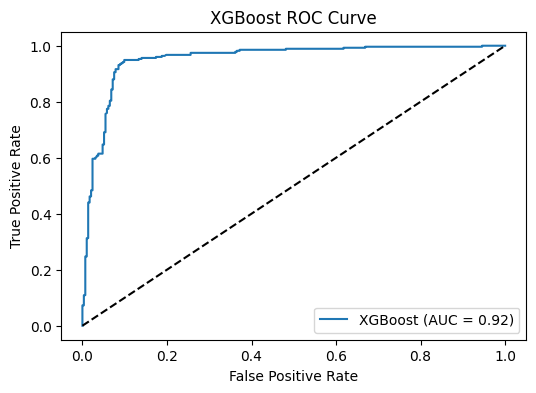

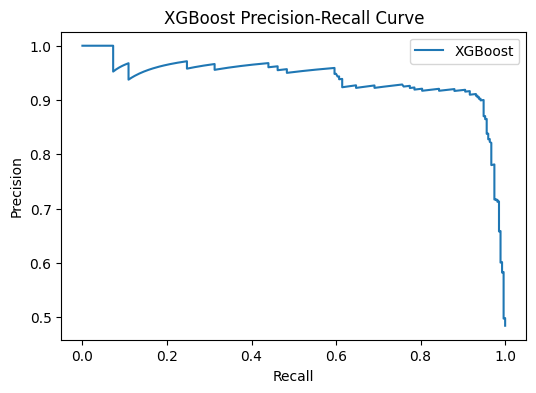

--- SVM Evaluation ---
Accuracy: 0.9313
Precision: 0.9214
Recall: 0.9382
F1-score: 0.9297
ROC-AUC: 0.9315


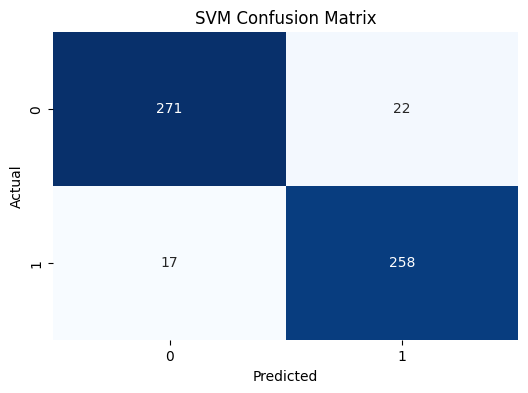

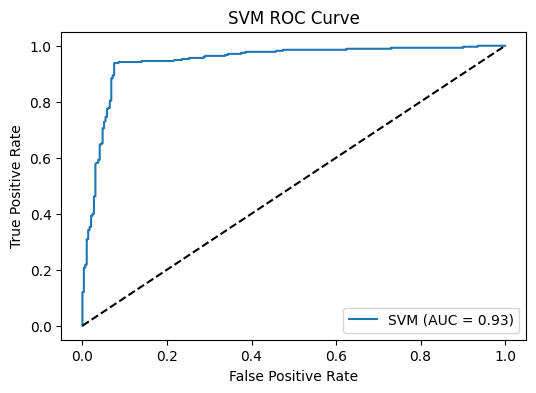

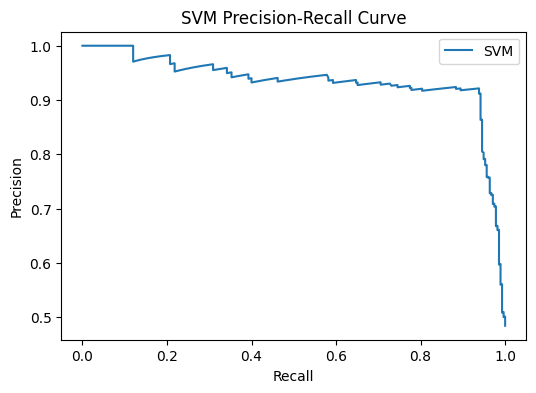

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred_rf, y_pred_xgb, y_pred_svm are available from previous steps
models = {
    "Random Forest": (rf_model, y_pred_rf),
    "XGBoost": (xgb_model, y_pred_xgb),
    "SVM": (svm_model, y_pred_svm)
}

for name, (model, y_pred) in models.items():
    print(f"--- {name} Evaluation ---")

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) # Note: ROC-AUC needs predicted probabilities if available, using binary predictions here

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (requires probability predictions, using decision_function for SVM and predict_proba for others)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--') # Random guess line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend()
        plt.show()
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--') # Random guess line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend()
        plt.show()


    # Precision-Recall Curve (requires probability predictions or decision scores)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(recall, precision, label=f'{name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{name} Precision-Recall Curve')
        plt.legend()
        plt.show()
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        plt.figure(figsize=(6, 4))
        plt.plot(recall, precision, label=f'{name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{name} Precision-Recall Curve')
        plt.legend()
        plt.show()

### Hyperparameter Tuning for Random Forest using GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5, # 5-fold cross-validation
                              scoring='accuracy',
                              n_jobs=-1) # Use all available cores

# Perform GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9343320593984303


### Model Interpretation: Feature Importance

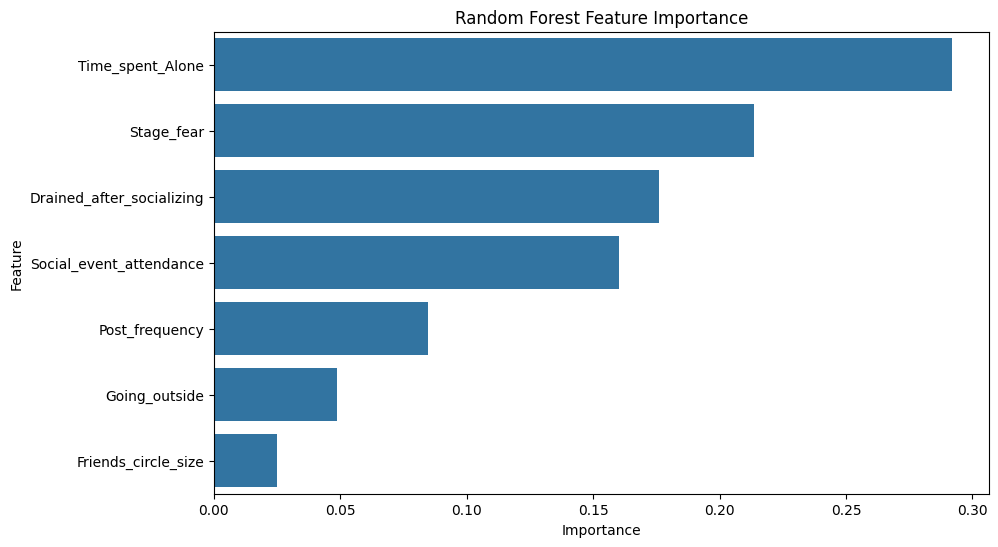

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for Random Forest (using the best tuned model)
if 'best_rf_model' in locals():
    feature_importances_rf = best_rf_model.feature_importances_
    features = X_train.columns
    importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
    importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
    plt.title('Random Forest Feature Importance')
    plt.show()
else:
    print("Tuned Random Forest model not found. Please run the hyperparameter tuning step.")


# # Feature importance for XGBoost
# if 'xgb_model' in locals():
#     feature_importances_xgb = xgb_model.feature_importances_
#     features = X_train.columns
#     importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})
#     importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Importance', y='Feature', data=importance_df_xgb)
#     plt.title('XGBoost Feature Importance')
#     plt.show()
# else:
#      print("XGBoost model not found. Please run the advanced models training step.")

In [80]:
!pip install shap lime

### LIME

In [81]:
import lime
import lime.lime_tabular
import numpy as np

# Using the best tuned Random Forest model
if 'best_rf_model' in locals() and 'X_train' in locals() and 'X_test' in locals() and 'y_train' in locals():

    # Create a LIME explainer
    # We need to provide the training data, feature names, and class names
    # The training data should be a numpy array or pandas DataFrame
    # The class names should correspond to the encoded target variable
    class_names = ['Extrovert', 'Introvert'] # Assuming 0: Extrovert, 1: Introvert based on LabelEncoder output

    explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                        feature_names=X_train.columns.tolist(),
                                                        class_names=class_names,
                                                        mode='classification')

    # Choose an instance to explain from the test set (e.g., the first instance)
    instance_idx = 0
    instance_to_explain = X_test.iloc[instance_idx].values

    # Get the explanation for the chosen instance
    # We need to provide the instance data and the model's prediction function
    # The prediction function should return probabilities for each class
    explanation = explainer.explain_instance(data_row=instance_to_explain,
                                             predict_fn=best_rf_model.predict_proba,
                                             num_features=len(X_train.columns)) # Explain all features


    # Visualize the explanation
    print(f"LIME Explanation for instance {instance_idx}:")
    explanation.show_in_notebook(show_table=True, show_all=False)

else:
    print("Required variables (best_rf_model, X_train, X_test, y_train) not found. Please run the previous steps.")

LIME Explanation for instance 0:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### SHAP

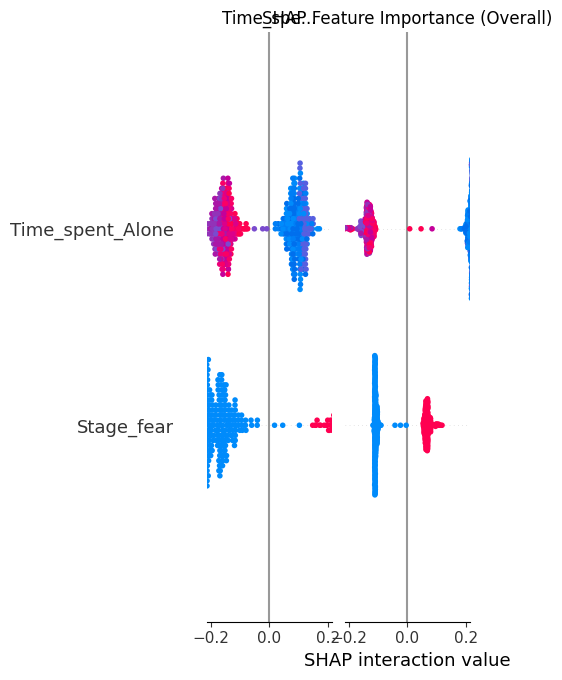

SHAP summary plots generated. Note: Experiencing issues with SHAP force plot at this time.


In [82]:
import shap
import matplotlib.pyplot as plt # Import matplotlib for show()

# Using the best tuned Random Forest model
if 'best_rf_model' in locals():
    # Create a SHAP explainer
    # For tree models, use TreeExplainer
    explainer = shap.TreeExplainer(best_rf_model)

    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)

    # Plot summary plot (shows feature importance and impact)
    # Pass the list of SHAP values for all classes to get a combined summary plot
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Overall)')
    plt.show()

    # You can also plot the summary for a specific class if needed,
    # but the bar plot provides a good overall feature importance view.
    # Example: shap.summary_plot(shap_values[1], X_test)

    print("SHAP summary plots generated. Note: Experiencing issues with SHAP force plot at this time.")

else:
    print("Tuned Random Forest model ('best_rf_model') not found. Please run the hyperparameter tuning step.")

### Save the Retrained Model

In [84]:
import joblib
import os

# Define the filename for the saved model
model_filename = 'best_random_forest_model.joblib'

# Assuming 'best_rf_model' is the retrained model on the full dataset
if 'best_rf_model' in locals():
    # Save the model to a file
    joblib.dump(best_rf_model, model_filename)

    print(f"Model successfully saved to '{model_filename}'")
    # Verify the file is saved
    print(f"Checking if model file exists: {os.path.exists(model_filename)}")
else:
    print("Retrained model ('best_rf_model') not found. Please ensure the retraining step was completed successfully.")

Model successfully saved to 'best_random_forest_model.joblib'
Checking if model file exists: True
